In [ ]:
install.packages("igraph")
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**TASK 1** Create a connected random graph n=5, m=6. Using the Kirchhoff’s matrix tree theorem, calculate the number of spanning trees by two methods:
a) eigenvalues of its Laplacian and
b) cofactor of the Laplacian. Plot all trees on a graph. **(EVGENY GUZEEV)**

[1] 5.000000e+00 4.000000e+00 2.000000e+00 1.000000e+00 3.552714e-15

[1] 8
[1] 8


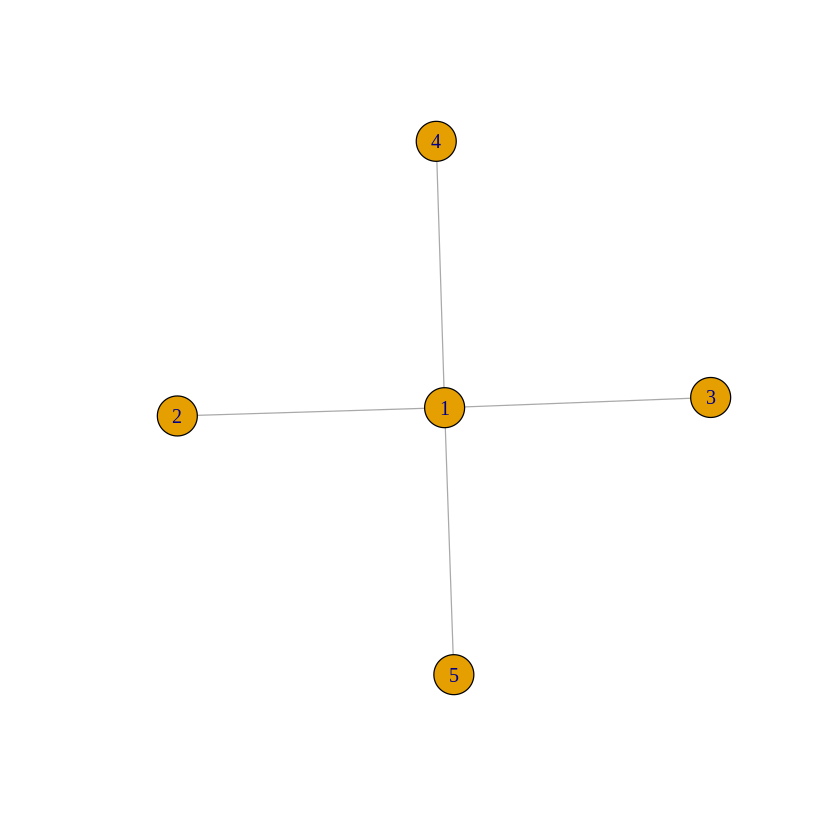

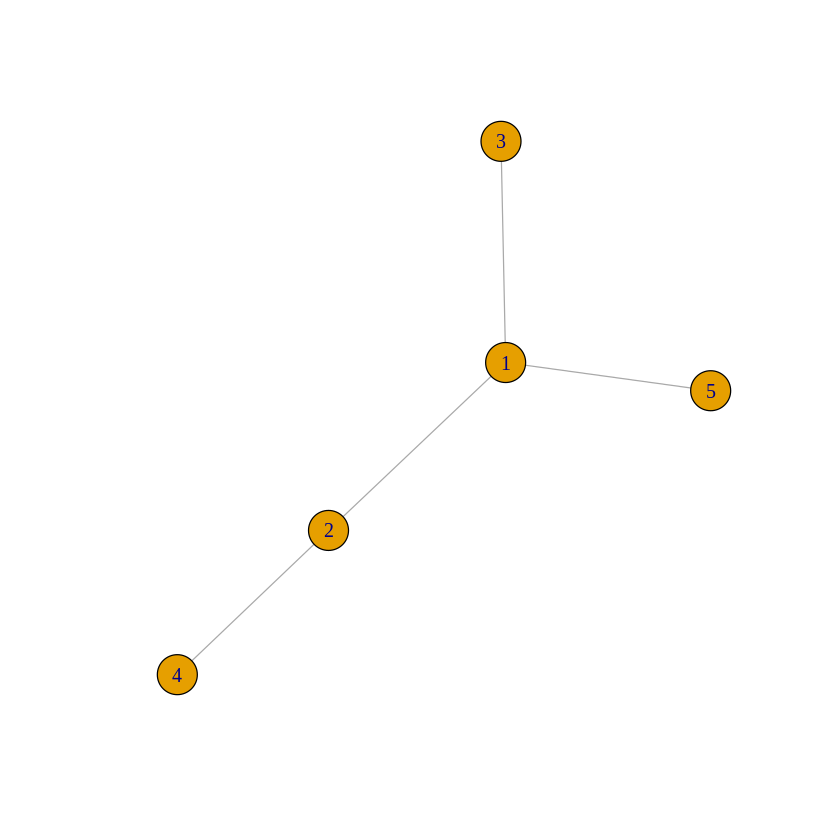

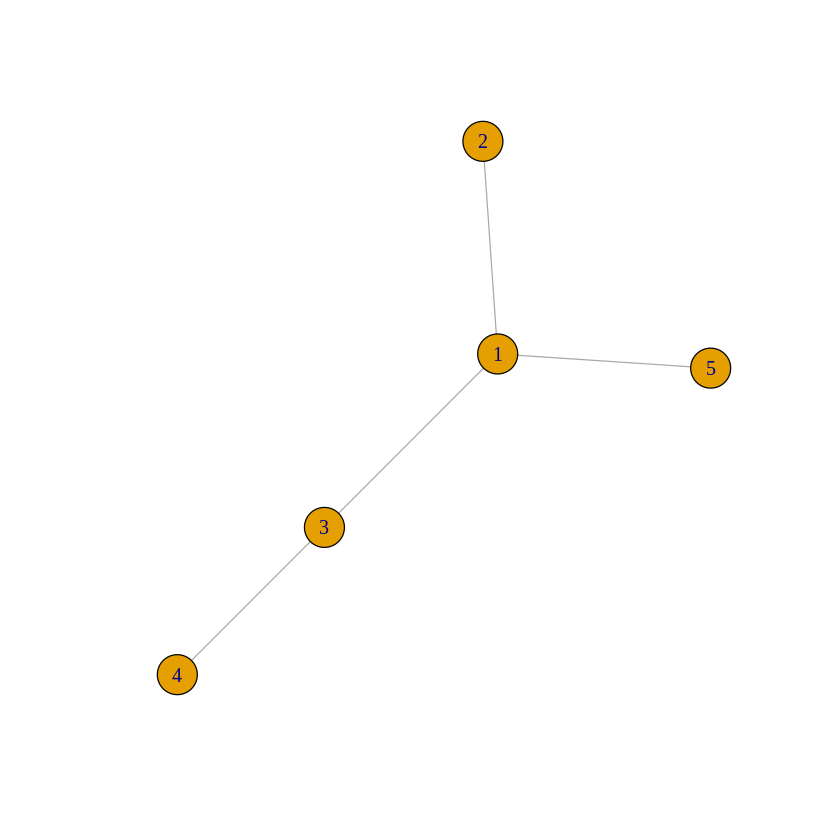

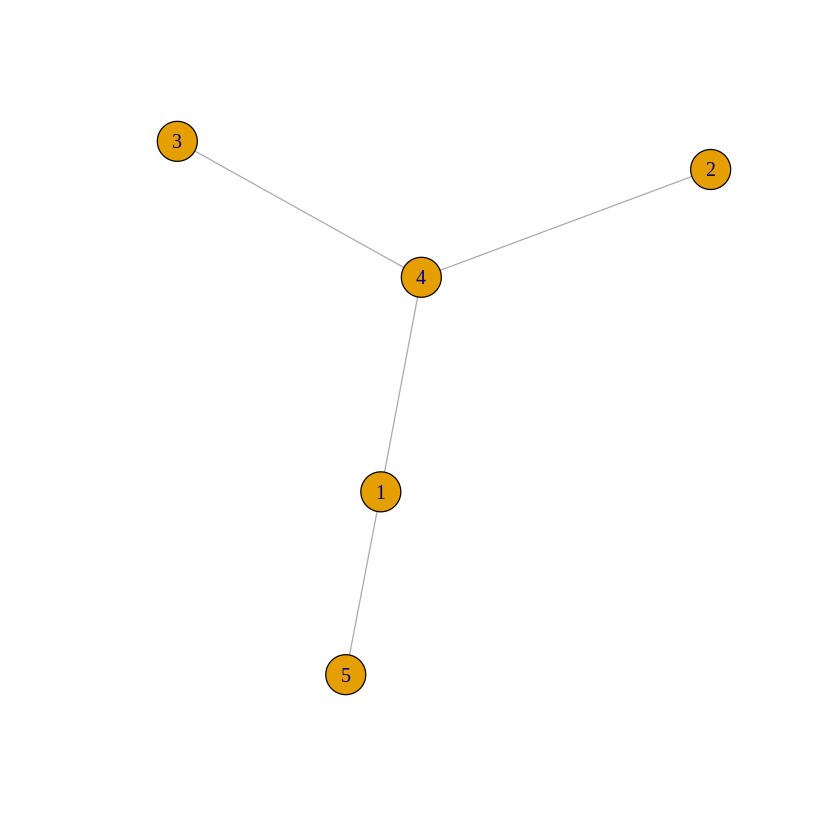

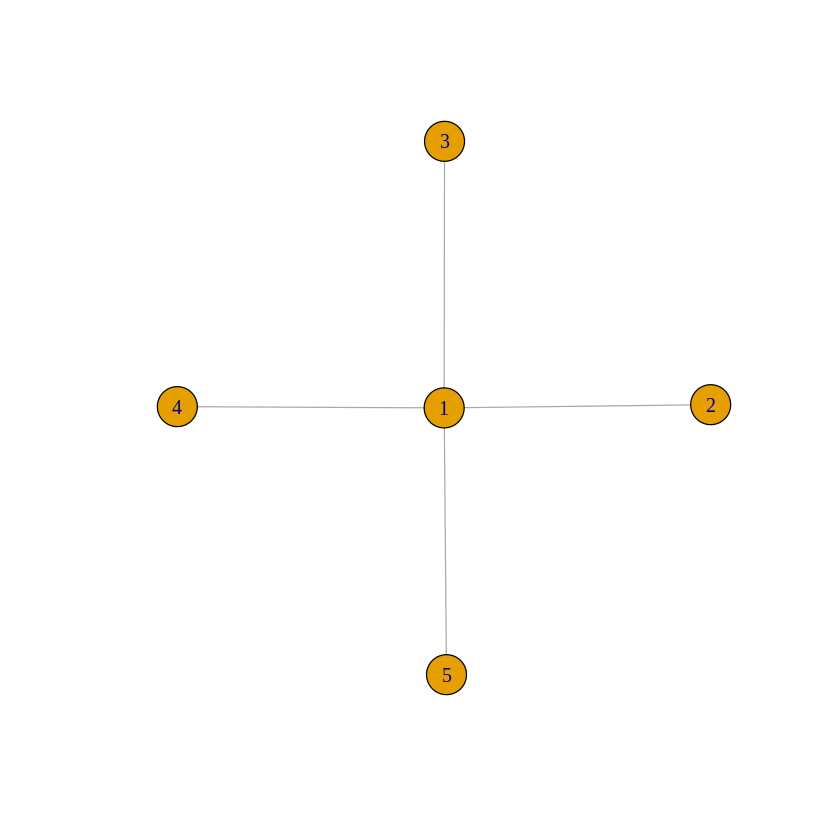

In [ ]:
n <- 5
m <- 6

library("igraph")
library("Matrix")

g = erdos.renyi.game(n=n, p.or.m = m, type="gnm")

set.seed(46)

# getting of laplacian matrix

lap<-laplacian_matrix(g)

# calculation eigenvalues of laplacian matrix task 1a
eig<-eigen(lap)
eig$values

mult <- 1
for (i in 1:(length(eig$values)-1)) {
  mult <- mult * eig$values[i]
  
}  
count_spaning_trees_eigen <- mult/n



# getting of cofactor laplacian matrix (task 1b)

stopifnot(length(unique(dim(lap)))==1)
cf <- lap
for(j in 1:dim(lap)[1]) { 
  for(k in 1:dim(lap)[2]) { 
    cf[j,k] <-(det(lap[-j,-k]) * (-1)^(j+k))
  }
}
count_spaning_trees_cofactor <- cf[1,1]

print(count_spaning_trees_eigen)
print(count_spaning_trees_cofactor)
for (i in 1:n) { 
  r <- graph.bfs(g, root=i, neimode='all', order=TRUE, father=TRUE) 
  h <- graph( rbind(r$order, r$father[r$order, na_ok = TRUE])[,-1], directed=FALSE ) 
  plot(h) 
}

**TASK 2**Create a directed random graph (n=10, m=20) and find shortest paths between vertices with Dijkstra, Bellman-Ford, Johnson algorithms. Provide  results in Figure with text description.

[1] "dijkstra - 5"
[1] "bellman-ford - 5"
[1] "johnson - 5"
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    0    2    2    2    3    1    2    2    1     2
 [2,]    2    0    2    2    2    1    2    1    2     2
 [3,]    2    2    0    2    2    2    2    1    1     1
 [4,]    2    2    2    0    1    2    1    1    1     2
 [5,]    3    2    2    1    0    2    2    1    2     3
 [6,]    1    1    2    2    2    0    1    1    2     1
 [7,]    2    2    2    1    2    1    0    2    2     1
 [8,]    2    1    1    1    1    1    2    0    1     2
 [9,]    1    2    1    1    2    2    2    1    0     2
[10,]    2    2    1    2    3    1    1    2    2     0
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]    0    2    2    2    3    1    2    2    1     2
 [2,]    2    0    2    2    2    1    2    1    2     2
 [3,]    2    2    0    2    2    2    2    1    1     1
 [4,]    2    2    2    0    1    2    1    1    1     2
 [5,]    3    2    2    1   

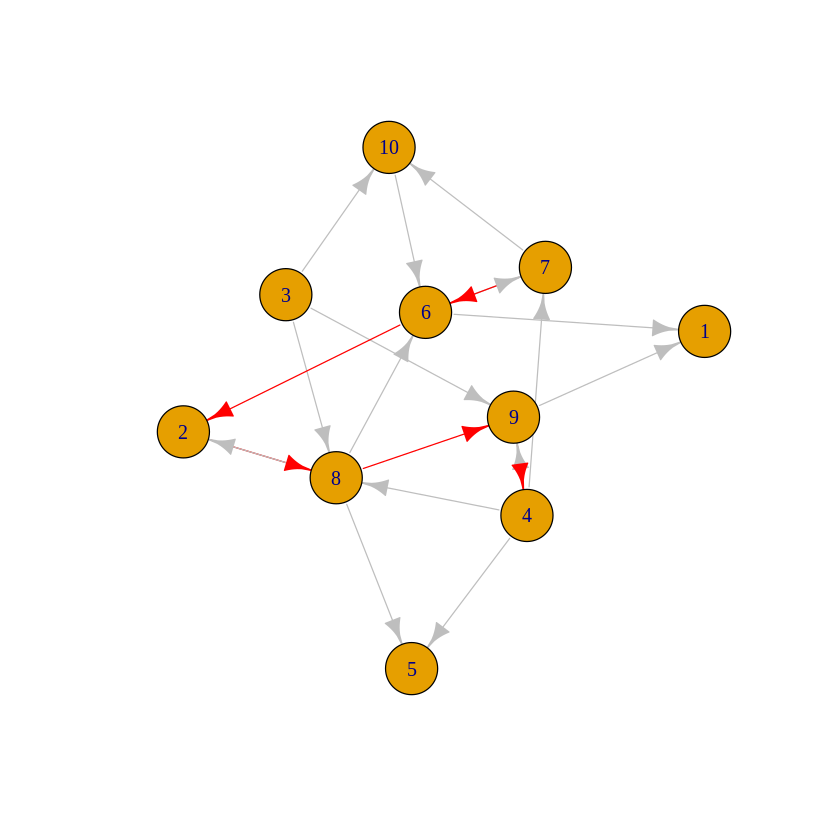

In [ ]:
library(igraph) 
set.seed(4) 
g <- erdos.renyi.game(n=10, p.or.m=20, type="gnm" , directed=TRUE, loops=FALSE) 
 
dis1 <- distances(g,mode="out",v=7,to=4,algorithm="dijkstra") 
dis2 <- distances(g,mode="out",v=7,to=4,algorithm="bellman-ford") 
dis3 <- distances(g,mode="out",v=7,to=4,algorithm="johnson") 
 
print(paste("dijkstra -",    dis1[1])) 
print(paste("bellman-ford -",dis2[1])) 
print(paste("johnson -",     dis3[1])) 
 
sp1 <- shortest.paths(g, algorithm = "dijkstra") 
print(sp1) 
sp2 <- shortest.paths(g, algorithm = "bellman-ford") 
print(sp2) 
sp3 <- shortest.paths(g, algorithm="johnson") 
print(sp3) 
 
asp <- all_shortest_paths(g, 7, 4) 
print(asp$res[[1]]) 
E(g)$color <- "grey" 
E(g, path=asp$res[[1]])$color <- "red" 
plot(g,vertex.size = 20)

**TASK 3** Read the paper (Kou et al., 1981), create the graph, Figure (a), set the Steiner points S={v1,v2,v3,v4} and find the Steiner tree with the Kou's algorithm. Compare obtained result with the tree, Figure (f).

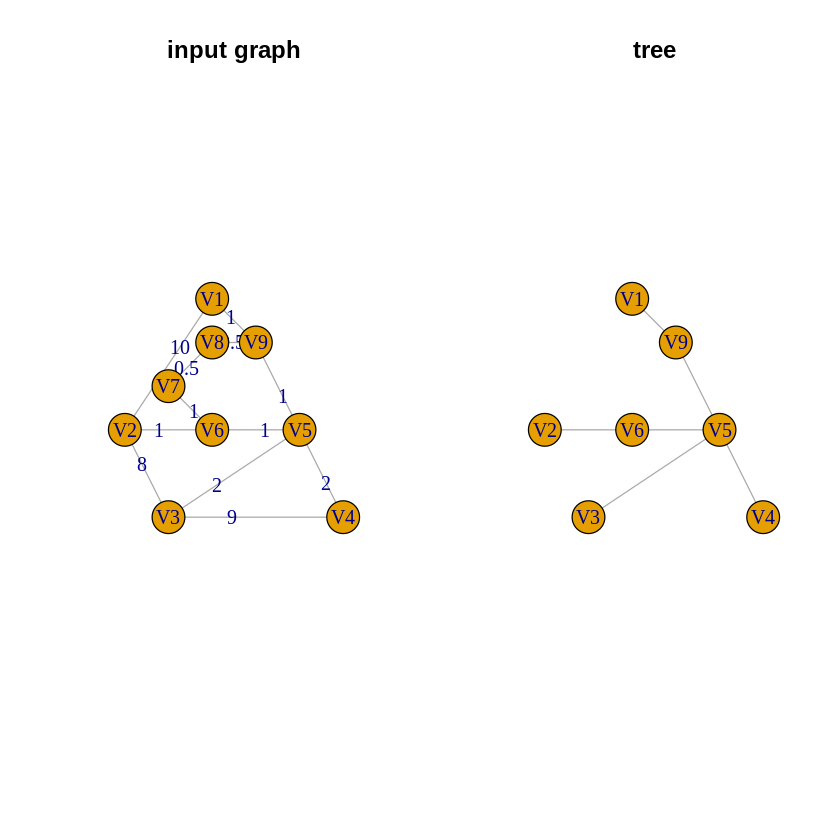

In [ ]:
library(igraph)
g <- graph.formula(1-2,2-3,3-4,4-5,3-5,5-6,2-6,6-7,7-8,8-9,5-9,1-9) 
E(g)$weight=c(10,1,8,1,9,2,2,1,1,1,0.5,0.5) 
V(g)$name <- c("V1","V2","V3","V4","V5","V6","V7","V8","V9") 

mylayout=matrix(c(3,1,2,6,5,3,2,3,4, 
                  6,3,1,1,3,3,4,5,5), nrow=9, ncol=2, byrow=FALSE)

mylayout1=matrix(c(3,1,2,6,5,4,3, 
                  6,3,1,1,3,5,3), nrow=7, ncol=2, byrow=FALSE)

## Some steiner nodes:
steiner.points <- V(g)$name[1:4]
## Complete distance graph G'
###################################

Gi <- graph.formula(1,2,3,4,1-4,1-3,2-4)
V(Gi)$name <- steiner.points
#E(Gi)$weight=c(4,4,4,4)



## Find a minimum spanning tree T' in G'
mst <- minimum.spanning.tree(Gi)
## For each edge in mst, replace with shortest path:
edge_list <- get.edgelist(mst)
Gs <- mst
for (n in 1:nrow(edge_list)) {
  i <- edge_list[n,2]
  j <- edge_list[n,1]
  ## If the edge of T' mst is shared by Gi, then remove the edge from T'
  ## and replace with the shortest path between the nodes of g:
  if (length(E(Gi)[which(V(mst)$name==i) %--% which(V(mst)$name==j)]) == 1) {
    ## If edge is present then remove existing edge from the
    ## minimum spanning tree:
    Gs <- Gs - E(Gs)[which(V(mst)$name==i) %--% which(V(mst)$name==j)]
    ## Next extract the sub-graph from g corresponding to the
    ## shortest path and union it with the mst graph:
    g_sub <- induced.subgraph(g, (get.shortest.paths(g, from=V(g)[i],
                                                     to=V(g)[j])$vpath[[1]]))
    Gs <- graph.union(Gs, g_sub)
  }
}
par(mfrow=c(1,2))
plot(g, vertex.size=30, layout=mylayout, main="input graph", edge.label=E(g)$weight)
plot(Gs,layout=mylayout1, vertex.size=30, main="tree")
